In [3]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df[['job_title_short','job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [14]:
# Use help[df.explode] if stuck
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

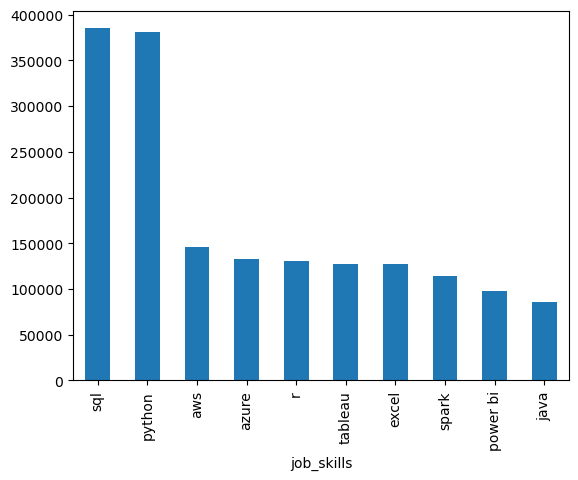

In [15]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [19]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()

type(skills_count)

pandas.core.series.Series

In [23]:
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count',ascending=False)
df_skills_count# want to change from series to dataframe

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


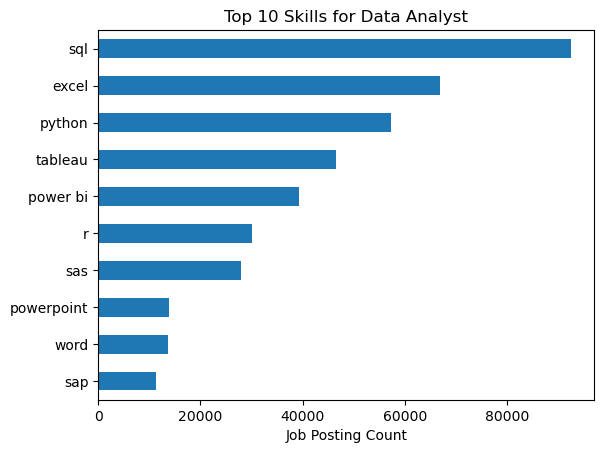

In [30]:
job_title = 'Data Analyst'
tops_skills = 10
# this is only top 10 skills for data analyst role. You can change job title and number of skills to display
df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(tops_skills)
df_skill_final.plot(x='job_skills', y='skill_count', kind='barh', title=f'Top {tops_skills} Skills for {job_title}')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.gca().invert_yaxis()
plt.show()